<a href="https://colab.research.google.com/github/edgarreis/text-recognize/blob/main/Visao_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalação Libs

!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9
#!tesseract --list-langs
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-por is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
# Importar dependências

import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import cv2
import re
from google.colab.patches import cv2_imshow
from PIL import Image
from pytesseract import Output
from PIL import ImageFont, ImageDraw, Image



ModuleNotFoundError: ignored

In [ ]:
# Importar Pasta de Linguas pré-definidas

!mkdir tessdata

!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

mkdir: cannot create directory ‘tessdata’: File exists
--2023-10-01 20:07:29--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-10-01 20:07:29--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-10-01 20:07:30--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [ ]:
def caixa_texto(texto, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x,y), (x+w,y+h), cor, 2)

  return x, y, img


def escreve_texto(texto, x, y, img, fonte, tamanho_texto = 32, cor_texto = (0, 0, 255)):
  # Defina a cor do texto como vermelho (BGR: 0, 0, 255)

  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte, fill = cor_texto)
  img = np.array(img_pil)

  return img


**AULA 4**

Busca de informações

*Regular Expressions - RE*

In [ ]:

# Importação
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Imagens/Aula4-tabela_teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#cv2_imshow(rgb)

# Pré-processamento da imagem (imagem para metadados)
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config = config_tesseract, lang = 'por', output_type = Output.DICT)

# Identificação da Palavras e Marcação
img_copia = rgb.copy()
min_conf = 40
tipo_fonte = '/content/drive/MyDrive/Colab Notebooks/Imagens/calibri.ttf'
datas = []
cor_vermelho = (0,0,255)
padrao_data = '^[0-9]{1,2}\\/[0-9]{1,2}\\/[0-9]{4}$' # datas tipo: ['10/02/2021', '04/02/2021']

for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])

  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, cor_vermelho)
      img_copia = escreve_texto(texto, x, y, img_copia, tipo_fonte, tamanho_texto=18)
      datas.append(texto)
    else:
      x, y, img = caixa_texto(resultado, img_copia)

cv2_imshow(img_copia)


NameError: ignored

In [ ]:
pares = list(zip(resultado['conf'], resultado['text']))
pares

[('-1', ''),
 ('-1', ''),
 ('-1', ''),
 ('-1', ''),
 (91, 'DESPESAS'),
 (91, 'BANCÁRIAS'),
 ('-1', ''),
 ('-1', ''),
 ('-1', ''),
 (92, 'Tarifa'),
 (91, 'Manutenção'),
 (91, 'de'),
 (92, 'Conta'),
 (93, '-'),
 (92, 'Sicredi'),
 (91, 'Norte'),
 (92, 'SC'),
 (94, '-'),
 (92, 'CESTA'),
 (92, 'DE'),
 (91, '02/2021'),
 (86, '10/02/2021'),
 (86, 'Débito'),
 (88, 'Aut.'),
 ('-1', ''),
 (90, 'RELACIONAMENTO'),
 ('-1', ''),
 (92, 'Tarifa'),
 (92, 'de'),
 (92, 'Compensação'),
 (93, 'de'),
 (92, 'Boletos'),
 (93, '-'),
 (92, 'Sicredi'),
 (91, 'Norte'),
 (93, 'SC'),
 (96, '-'),
 (92, 'TARIFA'),
 (86, '02/2021'),
 (86, '04/02/2021'),
 (79, 'Débito'),
 (82, 'Aut.'),
 ('-1', ''),
 ('-1', ''),
 ('-1', ''),
 (91, 'COM'),
 (93, 'R'),
 (87, 'LIQUIDAÇÃO')]

**Atividade Aula 4**
buscando hora

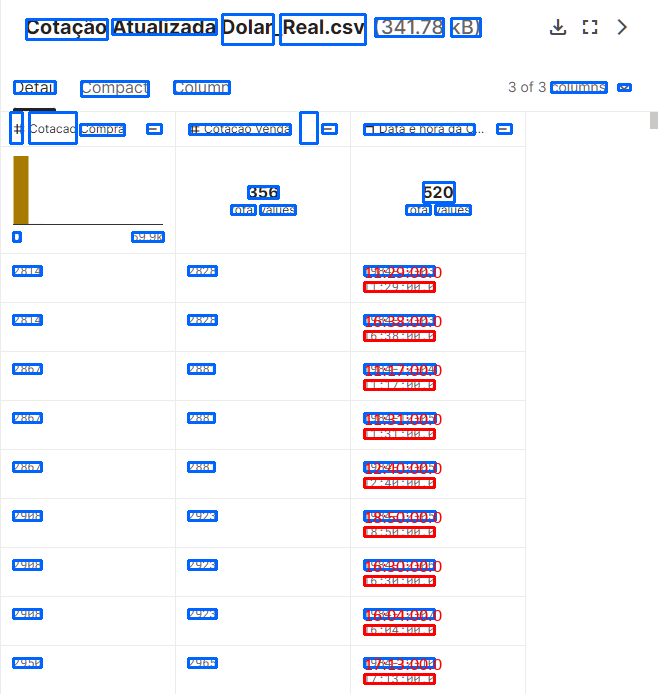

In [ ]:

# Importação
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Atividades/Aula4_cotacao.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#cv2_imshow(rgb)

# Pré-processamento da imagem (imagem para metadados)
config_tesseract = '--tessdata-dir tessdata --psm 6'  #--psm 4' 6
resultado = pytesseract.image_to_data(rgb, config = config_tesseract, lang = 'por', output_type = Output.DICT)

# Identificação da Palavras e Marcação
img_copia = rgb.copy()
min_conf = 25
tipo_fonte = '/content/drive/MyDrive/Colab Notebooks/Imagens/calibri.ttf'
dados = []
cor_vermelho = (0,0,255)

padrao_dados = '^([01]?[0-9]|2[0-3]):[0-5][0-9]:[0-5][0-9]\.\d$' # horas tipo ['16:38:00.0']

for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])

  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_dados, texto):
      x, y, img = caixa_texto(resultado, img_copia, cor_vermelho)
      img_copia = escreve_texto(texto, x, y, img_copia, tipo_fonte, tamanho_texto=18)
      dados.append(texto)
    else:
      x, y, img = caixa_texto(resultado, img_copia)

cv2_imshow(img_copia)


In [ ]:
dados

['11:29:00.0',
 '16:38:00.0',
 '11:17:00.0',
 '11:31:00.0',
 '12:40:00.0',
 '18:50:00.0',
 '16:30:00.0',
 '16:04:00.0',
 '17:13:00.0']

In [ ]:
pares = list(zip(resultado['conf'], resultado['text']))
pares

[('-1', ''),
 ('-1', ''),
 ('-1', ''),
 ('-1', ''),
 (92, 'Cotação'),
 (92, 'Atualizada'),
 (72, 'Dolar.'),
 (87, 'Real.csv'),
 (91, '(341.78'),
 (67, 'kB)'),
 (20, '&>'),
 ('-1', ''),
 (79, 'Detail'),
 (61, 'Compact'),
 (64, 'Column'),
 (18, '3013'),
 (88, 'columas'),
 (89, 'v'),
 ('-1', ''),
 (36, 'tH'),
 (36, 'Cotacao'),
 (51, 'Compra'),
 (75, '=='),
 (7, '—'),
 (81, 'itCotacaoVenta'),
 (63, '—'),
 (63, '='),
 (6, '—'),
 (47, 'MDataehoradaC..'),
 (59, 'E'),
 ('-1', ''),
 ('-1', ''),
 (96, '356'),
 (82, '520'),
 ('-1', ''),
 (88, 'total'),
 (71, 'values'),
 (88, 'total'),
 (78, 'values'),
 ('-1', ''),
 (88, 'o'),
 (66, '59.9k'),
 ('-1', ''),
 (94, '2814'),
 (95, '2828'),
 (87, '1984-12-03'),
 ('-1', ''),
 (54, '11:29:00.0'),
 ('-1', ''),
 (94, '2814'),
 (95, '2828'),
 (86, '1984-12-03'),
 ('-1', ''),
 (83, '16:38:00.0'),
 ('-1', ''),
 (96, '2867'),
 (91, '2881'),
 (89, '1984-12-04'),
 ('-1', ''),
 (33, '11:17:00.0'),
 ('-1', ''),
 (96, '2867'),
 (91, '2881'),
 (86, '1984-12-05'),
 ('